## Sample from a feature distribution (mimicking GC content, the length of a genomic interval, etc)

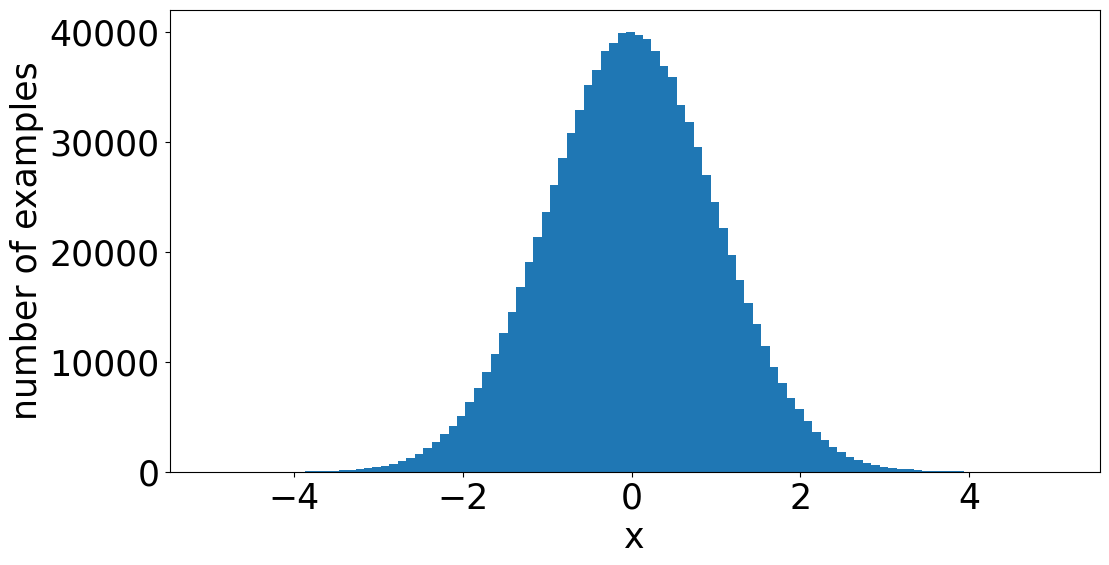

In [1]:
import matplotlib.pyplot as plt

from generate_data import plot_xs 

plt.rcParams.update({'font.size': 25})

NUMBER_EXAMPLES = 1000000 # Number of intervals

plot_xs(NUMBER_EXAMPLES)

## True mapping from feature to target (mimicking SNV counts)

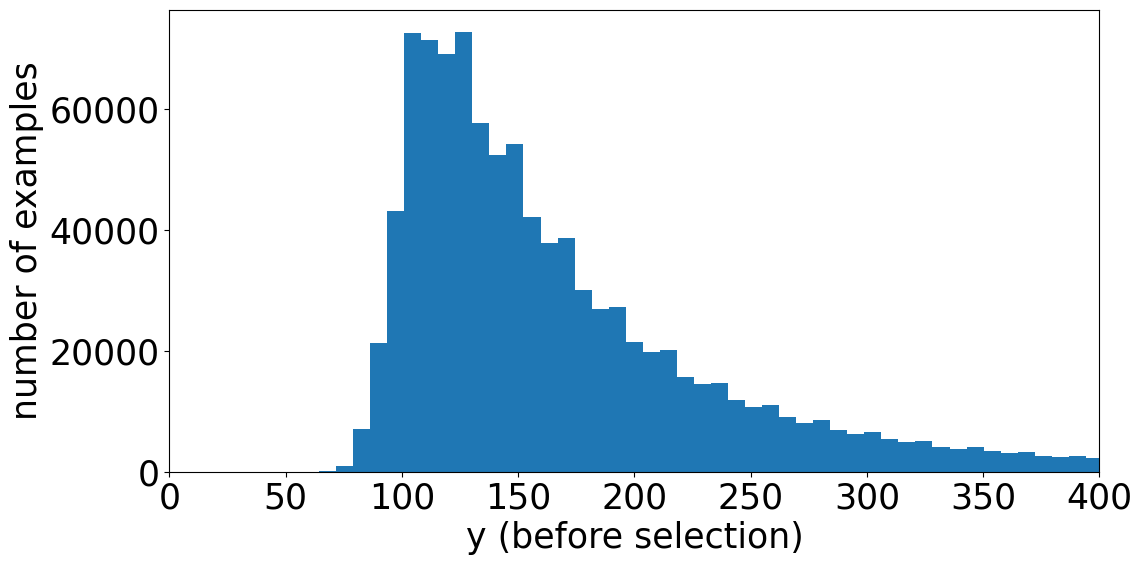

In [2]:
from generate_data import compute_true_params, plot_ys

# parameters of true model 
TRUE_PARAMS = compute_true_params(
    A = 5,
    B = 0.4,
    C = 0.1,
) 

plot_ys(TRUE_PARAMS, NUMBER_EXAMPLES)

## Introduce selection into a small fraction of examples

,x,y,constrained
0,0.927279,235,True
1,-0.346073,124,True
2,-0.770877,95,True
3,2.409790,690,True
4,-2.490648,85,True
...,...,...,...
999995,-0.586940,137,False
999996,0.793437,223,False
999997,-1.582335,111,False
999998,0.389127,167,False


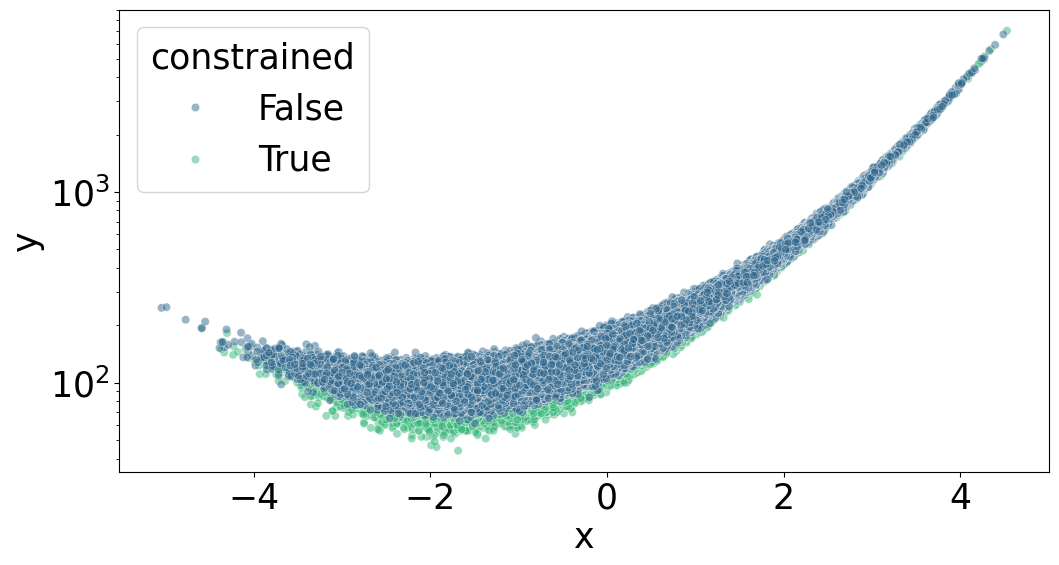

In [3]:
from generate_data import generate_xs_ys_with_selection, compute_y_pos_1

POSITIVE_FRACTION = 0.3 # informed by experiment

DATA = generate_xs_ys_with_selection(TRUE_PARAMS, NUMBER_EXAMPLES, POSITIVE_FRACTION, compute_y_pos_1)
DATA

## Fit neutral models

constant model of lambda:
alpha: 5.21 (A: 5)



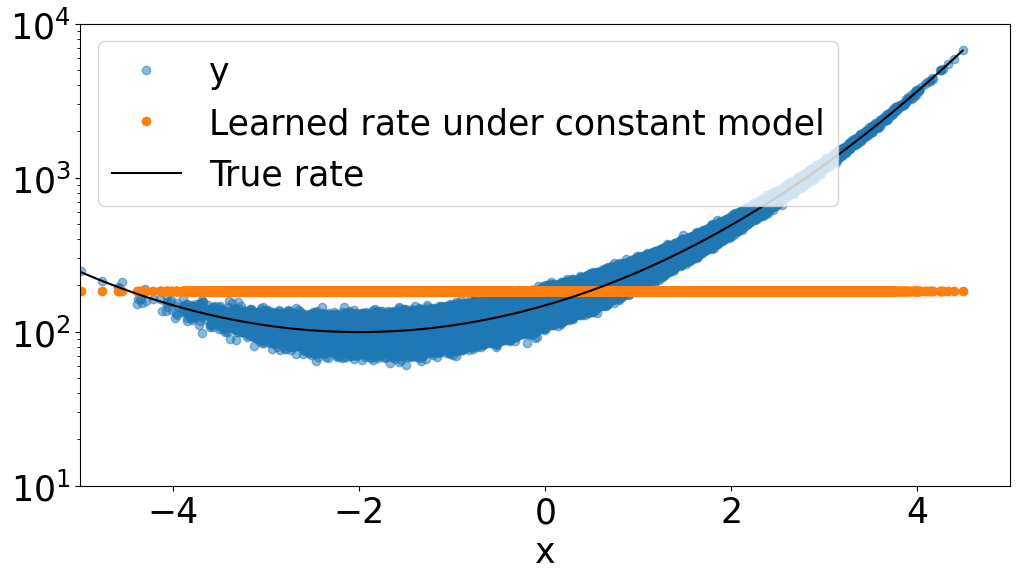

linear model of lambda:
alpha: 5.09 (A: 5)
beta: 0.50 (B: 0.4)



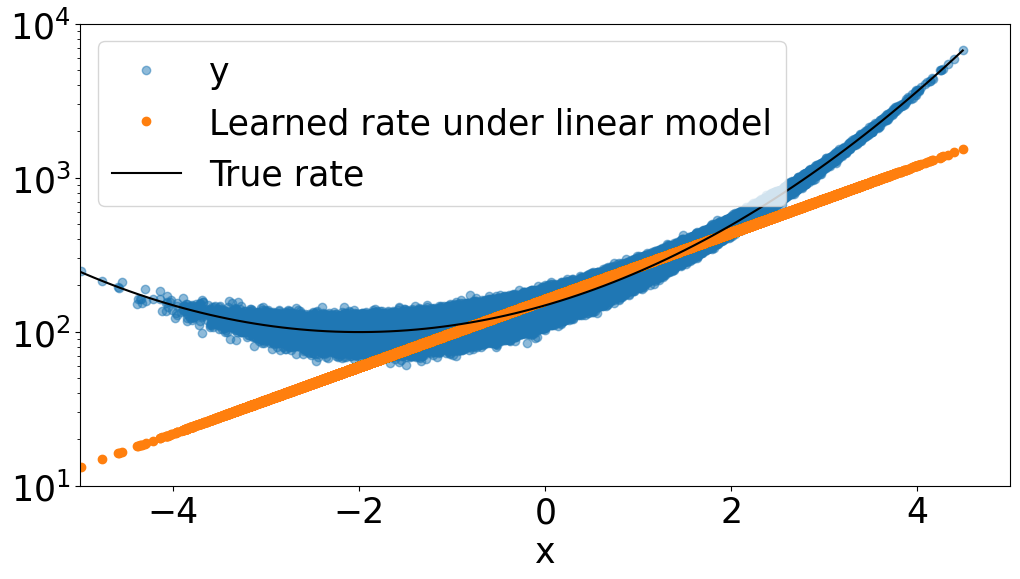

quadratic model of lambda:
alpha: 5.00 (A: 5)
beta: 0.40 (B: 0.4)
gamma: 0.10 (C: 0.1)



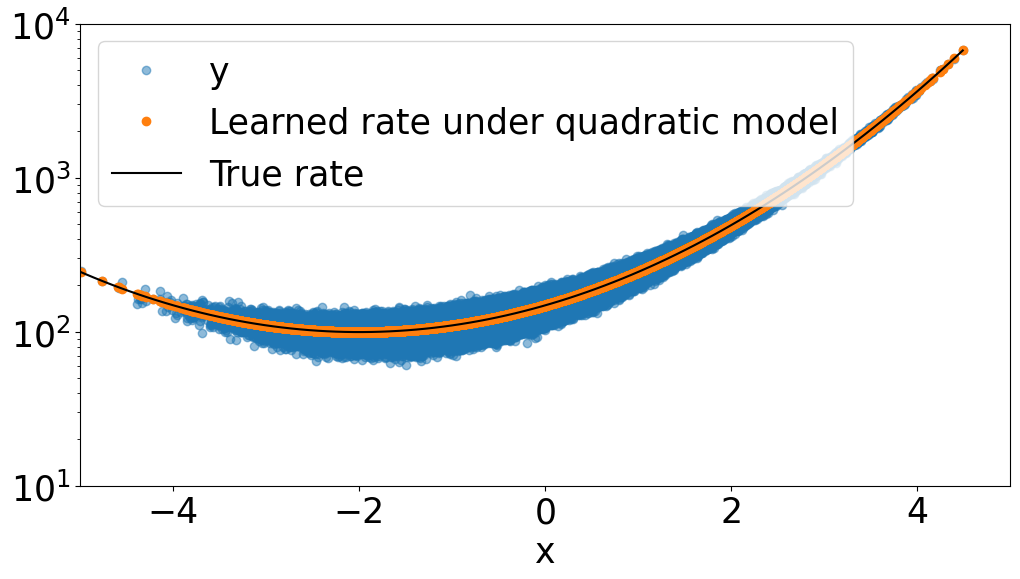

,x,y,constrained,predicted_y_constantModel,residuals_constantModel,standardized_residuals_constantModel,predicted_y_linearModel,residuals_linearModel,standardized_residuals_linearModel,x2,predicted_y_quadraticModel,residuals_quadraticModel,standardized_residuals_quadraticModel
0,0.927279,235,True,183.493289,-51.506711,-3.802364,257.449619,22.449619,1.399145,0.859846,234.371455,-0.628545,-0.041057
1,-0.346073,124,True,183.493289,59.493289,4.391955,136.063960,12.063960,1.034233,0.119766,130.782469,6.782469,0.593080
2,-0.770877,95,True,183.493289,88.493289,6.532813,109.989150,14.989150,1.429230,0.594251,115.706155,20.706155,1.924958
3,2.409790,690,True,183.493289,-506.506711,-37.391692,540.919754,-149.080246,-6.409936,5.807088,695.519687,5.519687,0.209295
4,-2.490648,85,True,183.493289,98.493289,7.271040,46.484280,-38.515720,-5.649174,6.203327,101.902392,16.902392,1.674388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.586940,137,False,183.493289,46.493289,3.432260,120.602266,-16.397734,-1.493159,0.344498,121.468756,-15.531244,-1.409204
999996,0.793437,223,False,183.493289,-39.506711,-2.916492,240.758832,17.758832,1.144520,0.629543,217.095647,-5.904353,-0.400725
999997,-1.582335,111,False,183.493289,72.493289,5.351650,73.258961,-37.741039,-4.409440,2.503784,101.231179,-9.768821,-0.970924
999998,0.389127,167,False,183.493289,16.493289,1.217579,196.628405,29.628405,2.112930,0.151420,176.054644,9.054644,0.682414


In [4]:
from fit_neutral_models import fit_poisson_model_wrapper

MODEL_TYPES = ['constant', 'linear', 'quadratic'] 

DATA = fit_poisson_model_wrapper(DATA, MODEL_TYPES, TRUE_PARAMS)
DATA

## Residuals are biased when models are misspecified 

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

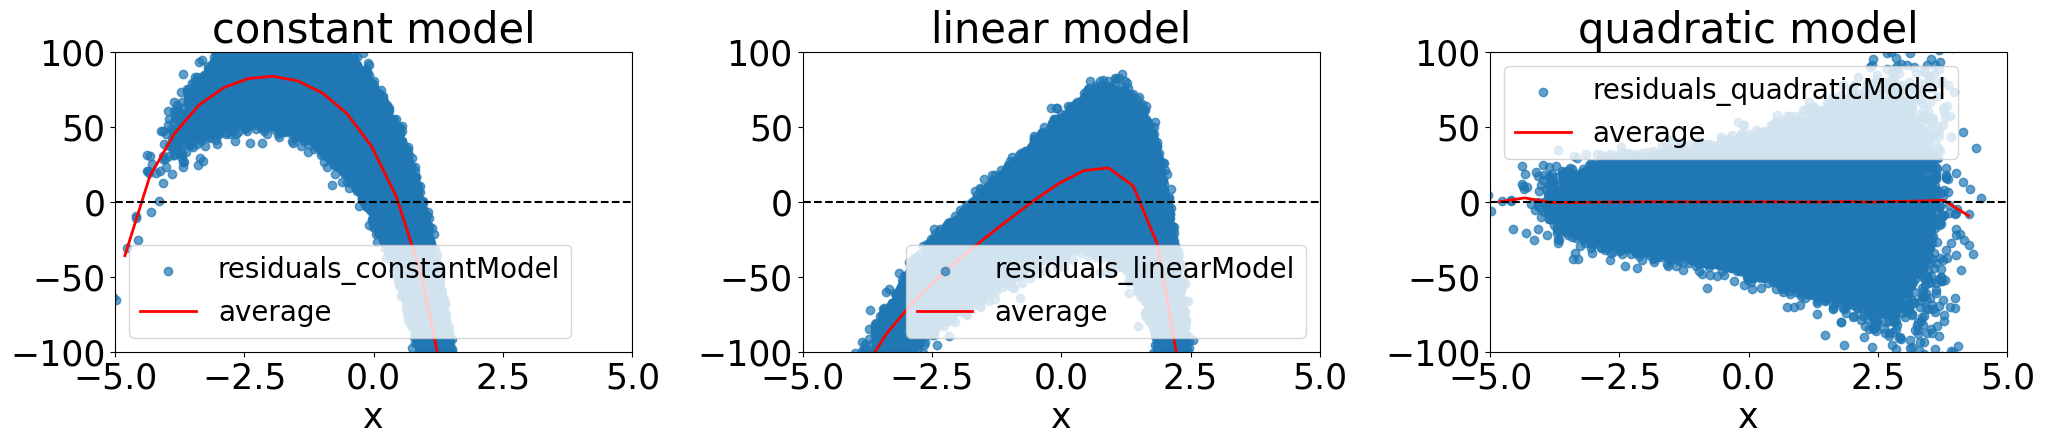

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

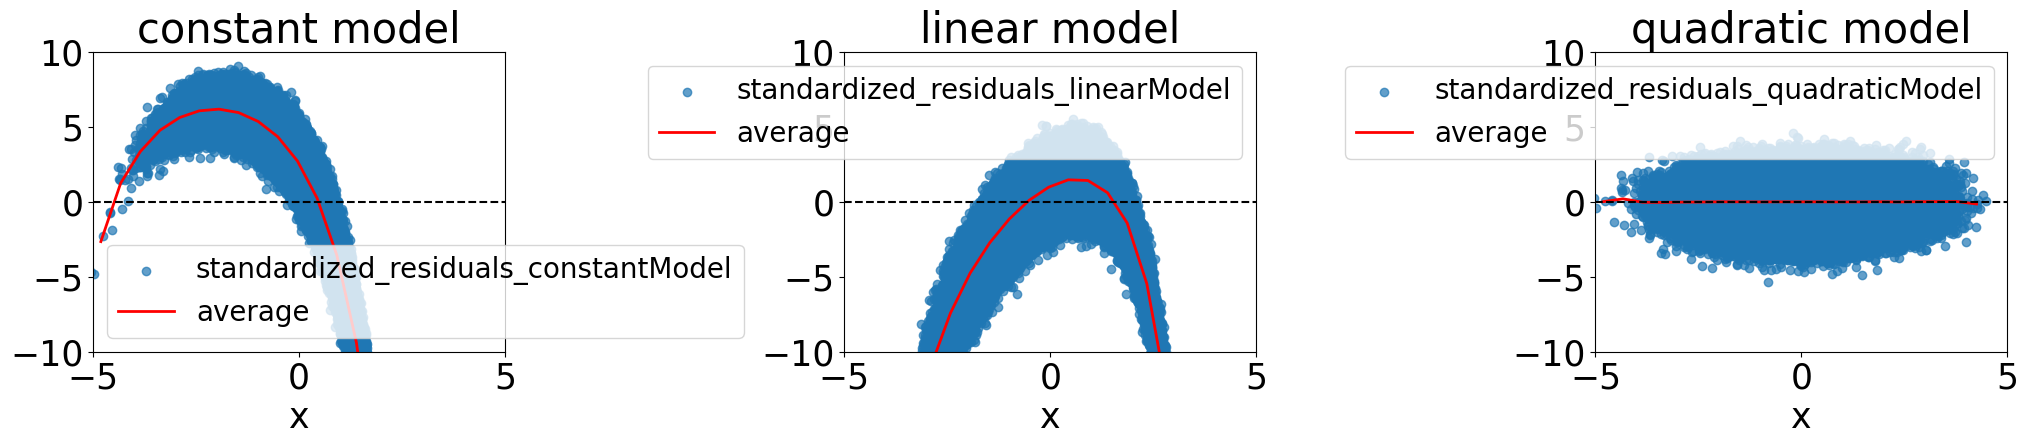

In [5]:
from plot_residuals import plot_residuals_vs_feature_all_models

plt.rcParams.update({'font.size': 25})

plot_residuals_vs_feature_all_models(DATA, standardized=False, model_types=MODEL_TYPES)
plot_residuals_vs_feature_all_models(DATA, standardized=True, model_types=MODEL_TYPES)

## Stratify neutral models' performances by x

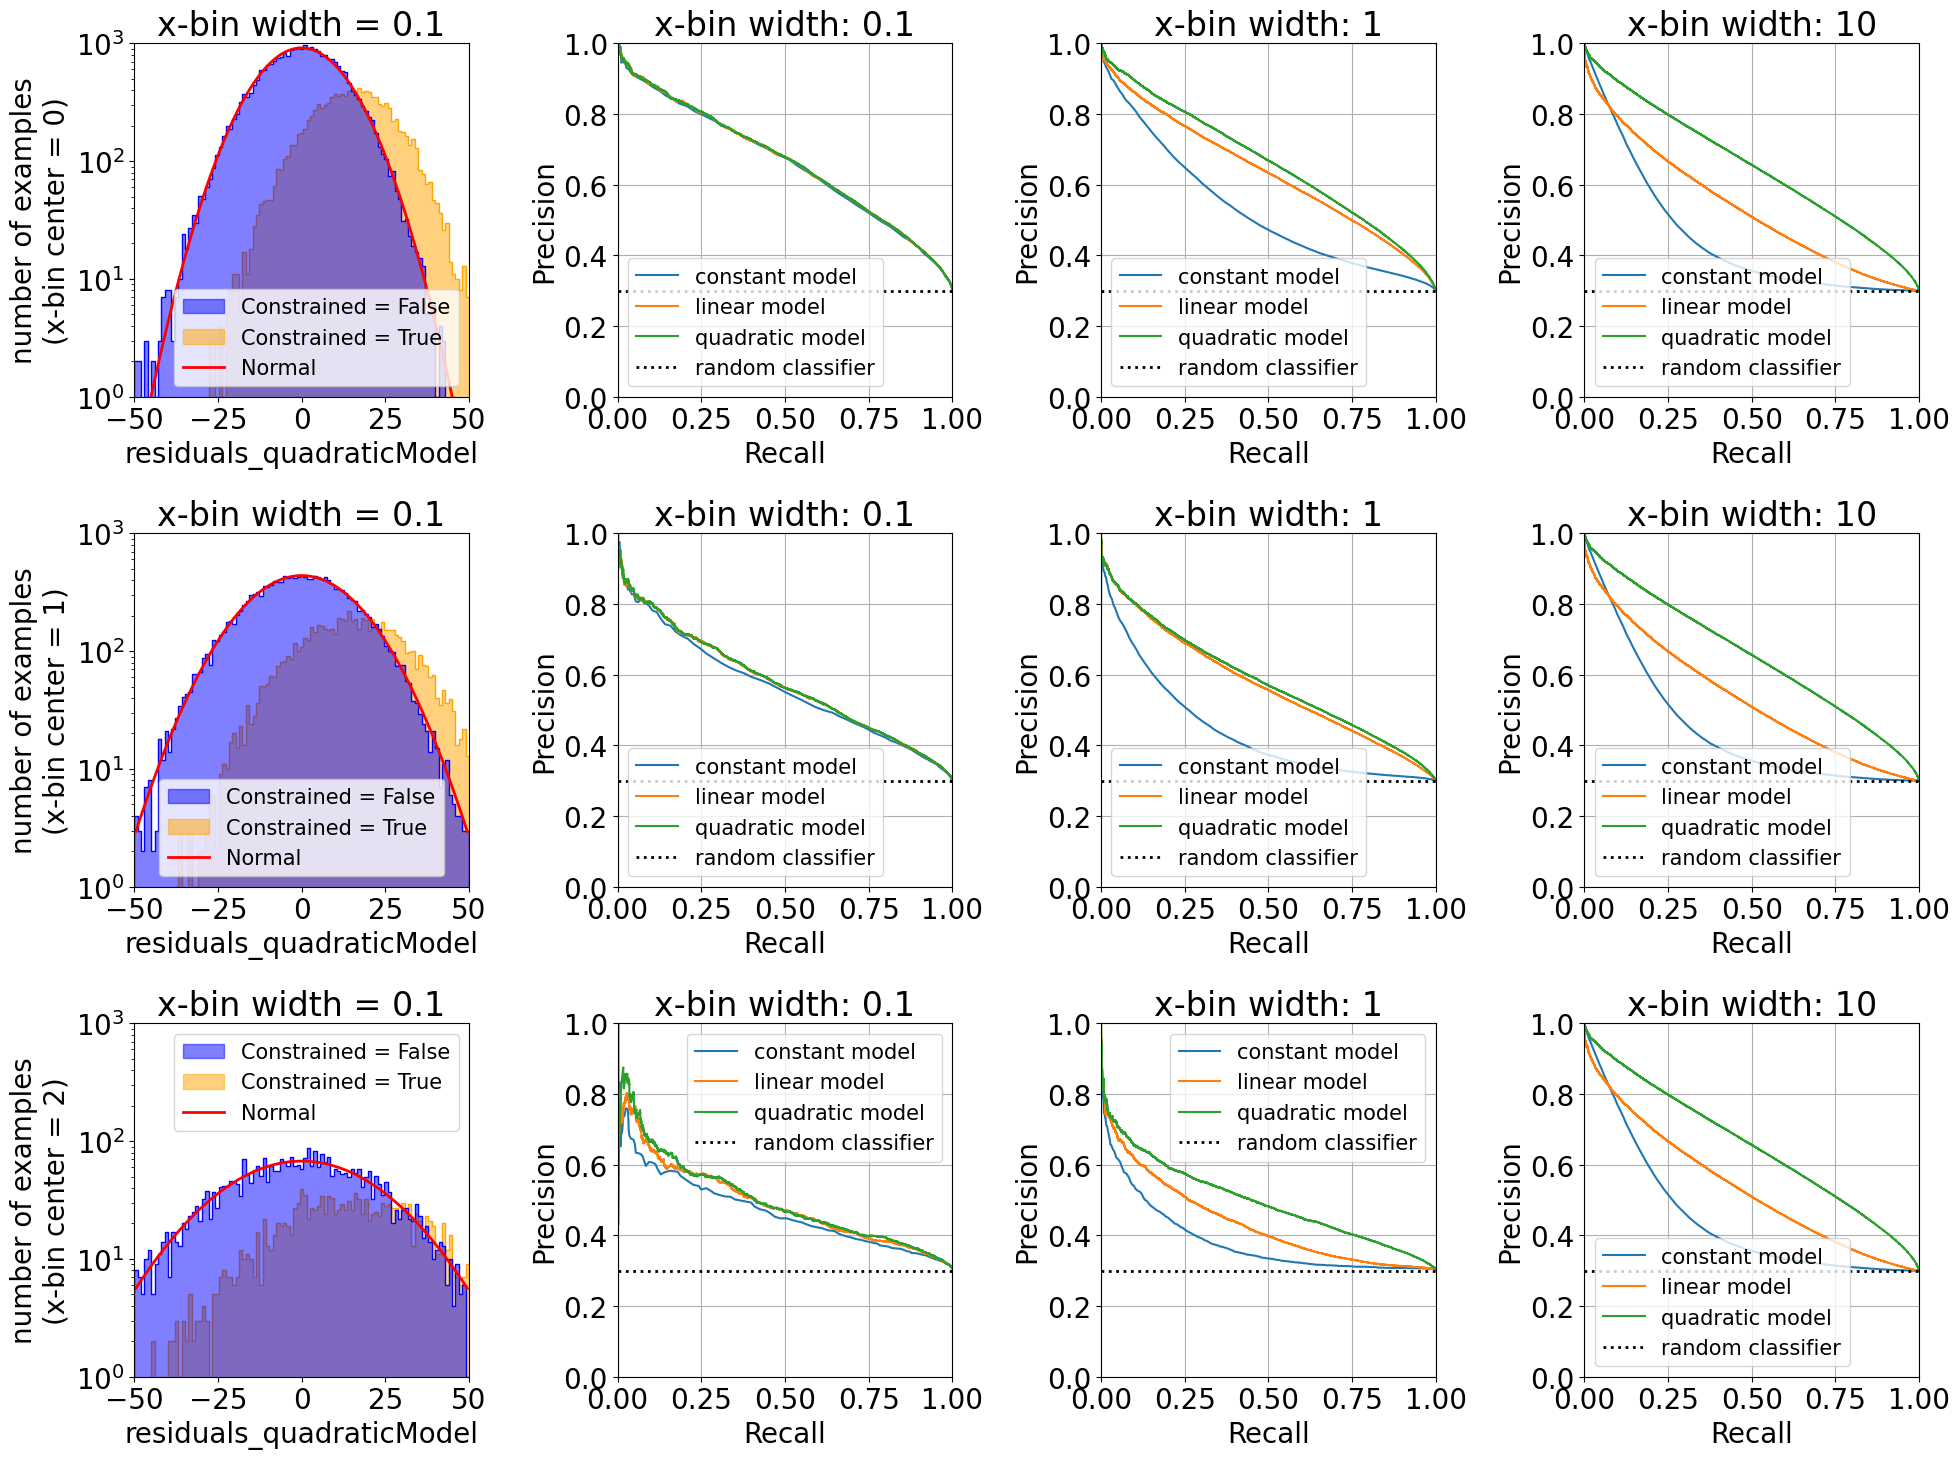

In [6]:
from predict_constraint import plot_pr_curve_wrapper

plt.rcParams.update({'font.size': 20})

plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION)

## Model bias is responsible for poor genome-wide performance 

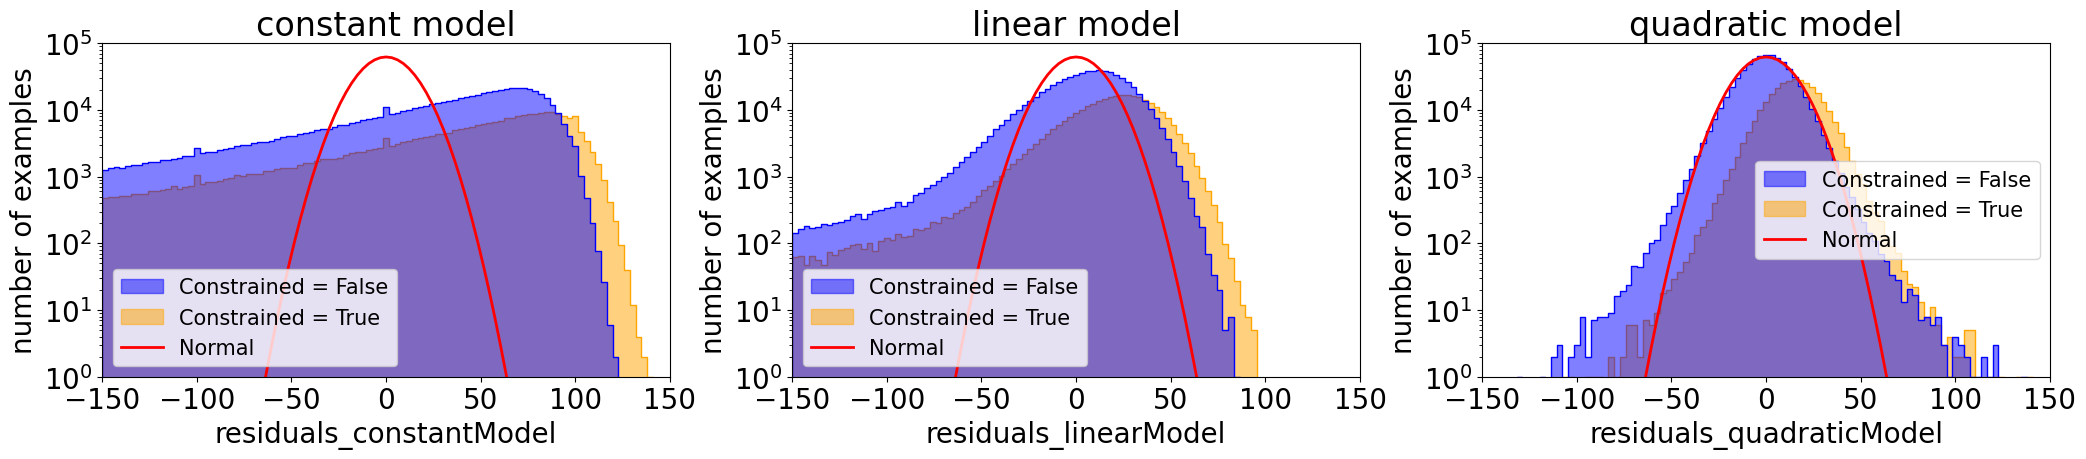

In [7]:
from predict_constraint import plot_residual_distributions_all_models

plot_residual_distributions_all_models(DATA, standardized=False, xlim=(-150, 150), model_types=MODEL_TYPES)

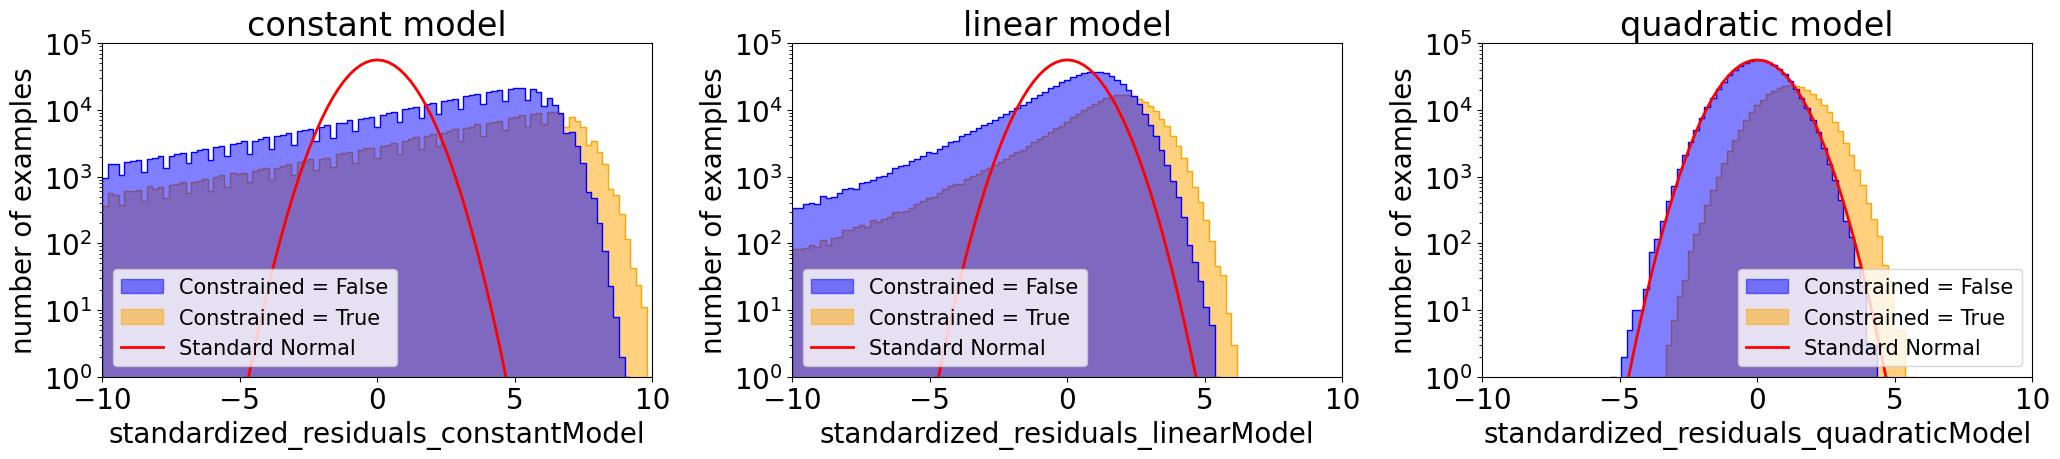

In [8]:
plot_residual_distributions_all_models(DATA, standardized=True, xlim=(-10, 10), model_types=MODEL_TYPES)

## How observed and expected SNV counts depend on standardized residuals

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized_residuals_{model_type}Model_bin')


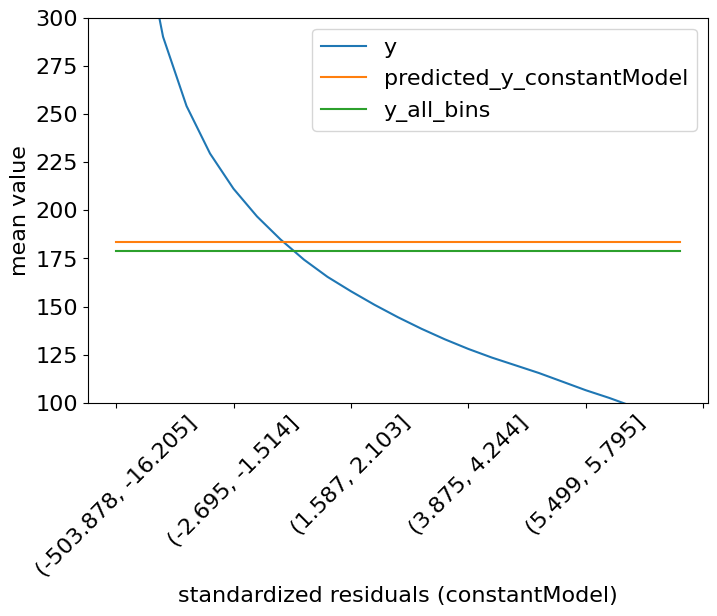

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized_residuals_{model_type}Model_bin')


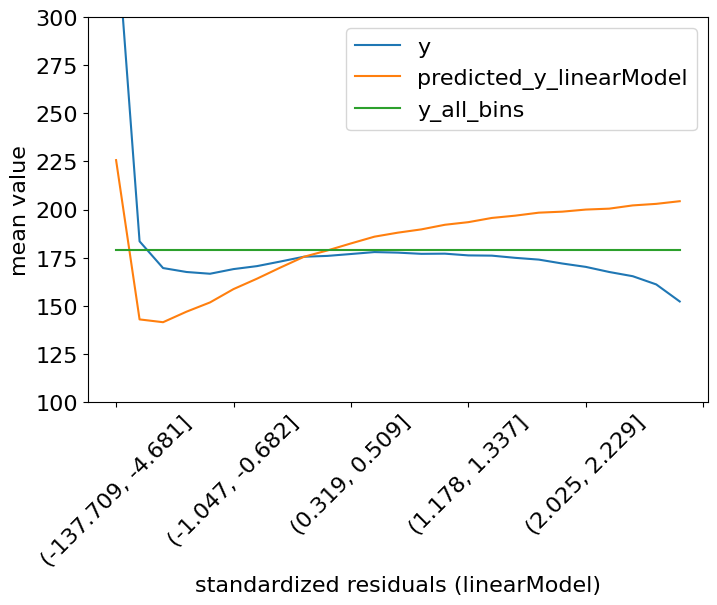

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized_residuals_{model_type}Model_bin')


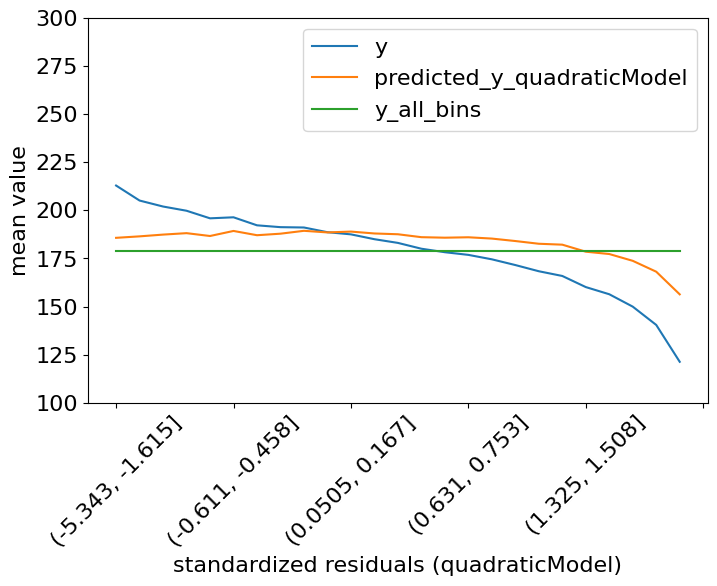

In [9]:
from snv_counts_vs_residuals import plot_snv_counts_vs_residuals_all_models

plt.rcParams.update({'font.size': 16})

plot_snv_counts_vs_residuals_all_models(DATA, MODEL_TYPES)

## How observed and expected SNV counts depend on z-scores in real experimental data

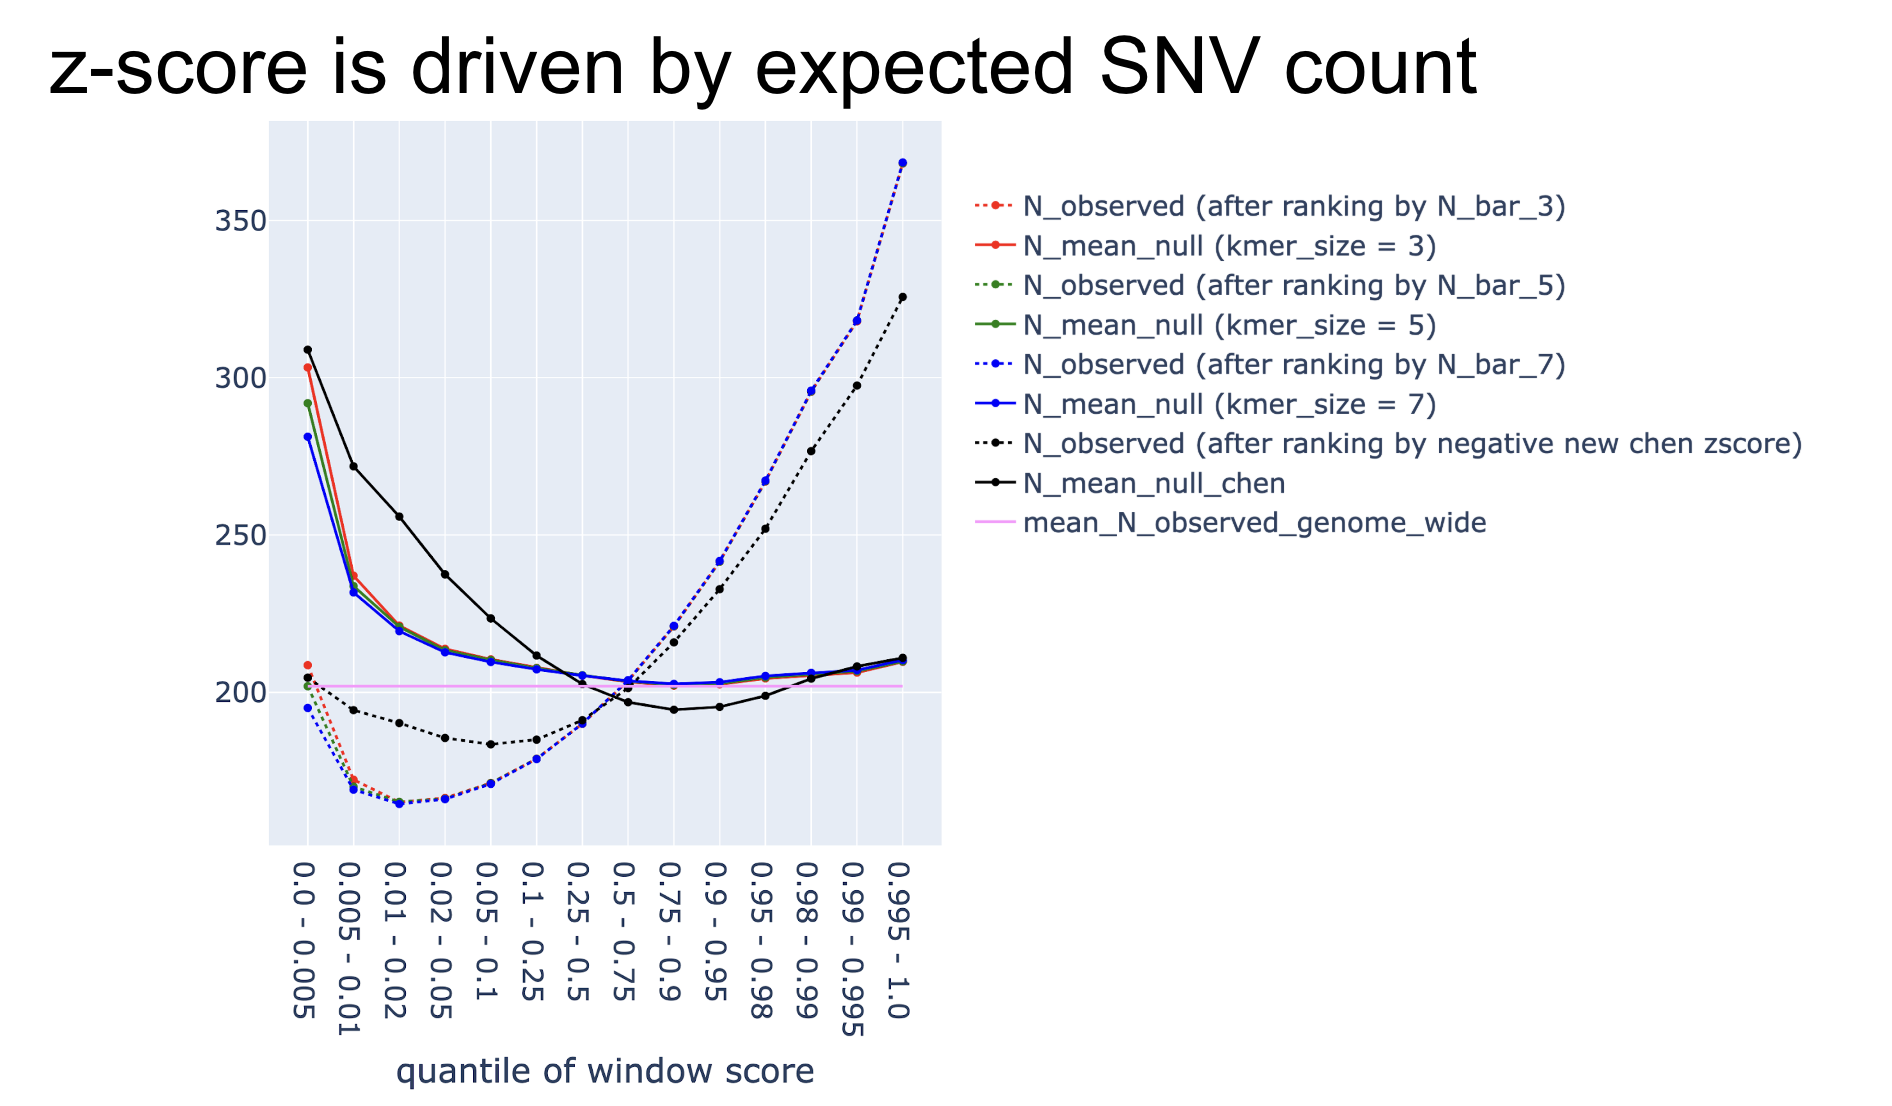

In [10]:
from IPython.display import Image

# smaller z-score is more constrained in the plot below 
# source: https://docs.google.com/presentation/d/1QyoCJSHlWG4FqyFuJ-mO7U-R0cqsIq5GhYjReAO1s60/edit#slide=id.g2257848117b_0_175
Image(filename='SNV-counts-vs-zscores.png', width=800)